## Leaf Disease Detection Using CNN  

In [1]:
#Intialization of Program. by Importing various LIbraries
import numpy as np
import matplotlib.pyplot as plt
# here we are working on Tensorflow version 2.1.0 so we need to write tensorflow.keras.
#keras is in built function in Tensorflow.
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Convolution2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [2]:
for types in os.listdir("C:/Users/KIIT/Desktop/Leaf_disease_detection/PlantVillage/plant_folder/"):
    print(str(len(os.listdir("C:/Users/KIIT/Desktop/Leaf_disease_detection/PlantVillage/plant_folder/"+ types)))+" "+ types+' images')

997 Pepper__bell___Bacterial_spot images
1478 Pepper__bell___healthy images
1000 Potato___Early_blight images
152 Potato___healthy images
1000 Potato___Late_blight images
2127 Tomato_Bacterial_spot images
1000 Tomato_Early_blight images
1591 Tomato_healthy images
1909 Tomato_Late_blight images
952 Tomato_Leaf_Mold images
1771 Tomato_Septoria_leaf_spot images
1676 Tomato_Spider_mites_Two_spotted_spider_mite images
1404 Tomato__Target_Spot images
373 Tomato__Tomato_mosaic_virus images
3209 Tomato__Tomato_YellowLeaf__Curl_Virus images


In [5]:
# Complete Dataset images can be loaded using ImageDataGenerator function
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("C:/Users/KIIT/Desktop/Leaf_disease_detection/PlantVillage/plant_folder/",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory("C:/Users/KIIT/Desktop/Leaf_disease_detection/PlantVillage/plant_folder/",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

Found 20638 images belonging to 15 classes.
Found 20638 images belonging to 15 classes.


In [42]:
detection=Sequential()

In [43]:
#convolutional layer-1
detection.add(Convolution2D(64,(3,3),padding='same',input_shape=(48,48,3)))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#2 -convolutional layer-2
detection.add(Convolution2D(128,(5,5),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#3 -convolutional layer-3
detection.add(Convolution2D(256,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#4 -convolutional layer-4
detection.add(Convolution2D(512,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#5 -convolutional layer-5
detection.add(Convolution2D(512,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

detection.add(Flatten())
detection.add(Dense(256))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

detection.add(Dense(512))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

detection.add(Dense(15,activation='softmax'))
optimum=Adam(lr=0.005)
#lr-learning rate
detection.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy'])


In [44]:

detection.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 128)      

In [45]:
ephocs=10
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps
detection.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=ephocs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)
detection.save('Plant_Disease_Detection.h5')

Epoch 1/10
322/322 [==============================] - 911s 3s/step - loss: 1.7590 - accuracy: 0.4370 - val_loss: 5.0324 - val_accuracy: 0.3017
Epoch 2/10
322/322 [==============================] - 943s 3s/step - loss: 0.7205 - accuracy: 0.7608 - val_loss: 3.6178 - val_accuracy: 0.4134
Epoch 3/10
322/322 [==============================] - 932s 3s/step - loss: 0.5094 - accuracy: 0.8255 - val_loss: 1.7738 - val_accuracy: 0.5764
Epoch 4/10
322/322 [==============================] - 879s 3s/step - loss: 0.4032 - accuracy: 0.8660 - val_loss: 1.0060 - val_accuracy: 0.6973
Epoch 5/10
322/322 [==============================] - 891s 3s/step - loss: 0.3302 - accuracy: 0.8860 - val_loss: 2.8808 - val_accuracy: 0.3931
Epoch 6/10
322/322 [==============================] - 868s 3s/step - loss: 0.2741 - accuracy: 0.9101 - val_loss: 0.2733 - val_accuracy: 0.9123
Epoch 7/10
322/322 [==============================] - 5273s 16s/step - loss: 0.2402 - accuracy: 0.9193 - val_loss: 2.2209 - val_accuracy: 0.56

'Tomato_healthy'

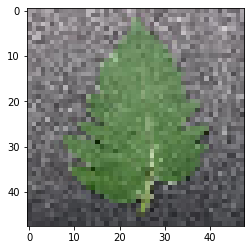

In [47]:
from tensorflow.keras.models import load_model
Detection=load_model('Plant_Disease_Detection.h5')
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
test_img=image.load_img("C:/Users/KIIT/Desktop/Leaf_disease_detection/PlantVillage/plant_folder/Tomato_healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.jpg",target_size=(48,48))
plt.imshow(test_img)
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=Detection.predict(test_img)
a=result.argmax()
# print('a:',a)
classes=train_generator.class_indices
# print(classes)
# print(len(classes))
category=[]
for i in classes:
          category.append(i)
for i in range(len(classes)):
          if(i==a):
              output=category[i]
output 